In [28]:
# from SteelMemberDesign import Flexure,Shear,CombineForce,Compression,Concentrated
import pandas as pd

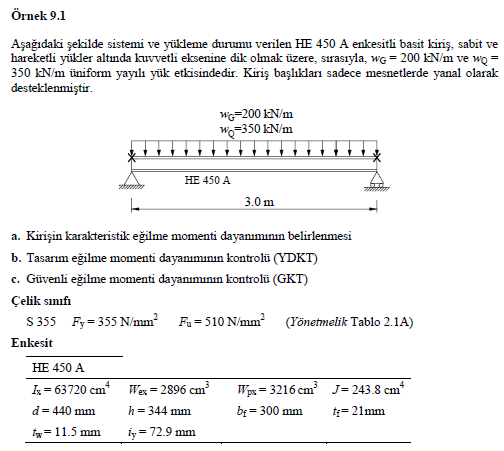 

In [29]:
# Geometri
d              = 440            #mm     -- Kesit yüksekliği
h              = 344            #mm     -- Gövde levhası yüksekliği
tw             = 11.5           #mm     -- Gövde levhası et kalınlığı
bf_compression = 300            #mm     -- Basınç etkisindeki başlık genişliği
bf_tension     = 300            #mm     -- Çekme etkisindeki başlık genişliği
tf_comp        = 21             #mm     -- Basınç etkisindeki başlık et kalınlığı
tf_tension     = 21             #mm     -- Çekme etkisindeki başlık et kalınlığı
a_stiffner     = 0              #mm     -- Rijitleştirme levhalarının ağırlık merkezleri arasındaki mesafe
h0             = 281            #mm     -- Enkesit basliklarinin agirlik merkezleri arasindaki uzaklik
Lb_ltb         = 10000          #mm     -- LTB olusmayan serbest boy siniri

#Mukavemet özellikleri
iy             = 72.9           #mm     -- Kesitin y eksenine göre atalet yaricapi
Jc             = 243.8*10**4    #mm^4   -- Burulma sabiti
Sx             = 2896*10**3     #mm^3   -- X ekseni etrafında elastik kesit mukavemet momenti S = I/c; c:tarafsız eksenden en uç noktaya olan mesafe, My = S * sigma_y 
Zx             = 3216*10**3     #mm^3   -- X ekseni etrafında plastik kesit mukavemet momenti. Plastik tarafsız eksene bağlıdır.
Iy             = 8563 *10**4    #mm^4   -- Y eksenindeki atalet momenti
Ix             = 63720 *10**4   #mm^4   -- Y eksenindeki atalet momenti

# Malzeme özellikleri
Fy             = 355            #N/mm^2 -- Kesit malzemesinin akma dayanimi 
E              = 2*10**5        #N/mm   -- Kesit malzemesinin elastisite modulu. Defaults to 2*10**5.

# Kuvvetler
Vu             = 12 * 10**5     #N      -- Kesite gelen kesme
Mu             = 8 * 10**8      #Nmm    -- Kesite gelen moment
Mmax           = 1              #Nmm    -- absolute value of the maximum moment in the unbraced segment
Ma             = 0.75           #Nmm    -- absolute value of moment at the quarter-point of the unbraced segment
Mb             = 1              #Nmm    -- absolute value of moment at the centerline of the unbraced segment
Mc             = 0.75           #Nmm    -- absolute value of moment at three-quarter point of the unbraced segment

In [55]:
def get_Series(df : pd.DataFrame, Column : str, Parameter : str) -> pd.Series:
    """DataFrame içerisinde verilen parametreyi ilgili kolonda bulur ve o satır bilgilerini pandas.Series olarak getirir.

    Args:
        df (pd.DataFrame): Dataların bilgisi
        Column (str): Kolon bilgisi
        Parameter (str): Aranacak parametre

    Returns:
        pd.Series: Aranan parametrenin bulunduğu satır bilgisi
    
    Example:
        >>sec = get_Series(df=df1,Column="AISC_Manual_Label.1",SectionName="W1100X499")\n
        >>sec
          Type                           W\n
          AISC_Manual_Label        W44X335\n
          AISC_Manual_Label.1    W1100X499\n
          W                          499.0\n
          A                          63500\n
                                  ...    
          PC                          2640\n
          PD                          3050\n
          T                            965\n
          WGi                          140\n
          WGo                            –\n
          Name: 0, Length: 83, dtype: object
    """
    Index = df[df[Column] == Parameter].index[0]
    return df.loc[Index]




In [8]:
# Kuvvetler
Vu             = 12 * 10**5   #N      -- Kesite gelen kesme
Mu             = 8 * 10**8    #Nmm    -- Kesite gelen moment
Mmax           = 1              #Nmm    -- absolute value of the maximum moment in the unbraced segment
Ma             = 0.75           #Nmm    -- absolute value of moment at the quarter-point of the unbraced segment
Mb             = 1              #Nmm    -- absolute value of moment at the centerline of the unbraced segment
Mc             = 0.75           #Nmm    -- absolute value of moment at three-quarter point of the unbraced segment
M_ltb = Flexure(
                Mu   = Mu,
                Lb   = Lb_ltb,
                Iy   = HE450A.Iy,
                h0   = h0,
                Sx   = HE450A.Wez,
                Zx   = HE450A.Wpz,
                iy   = HE450A.iy,
                Fy   = Fy,
                E    = E,
                J    = HE450A.IT,
                Mmax = Mmax,
                Ma   = Ma,
                Mb   = Mb,
                Mc   = Mc,
                fi_d = 0.9
            )

NameError: name 'Flexure' is not defined

In [ ]:
from math import sqrt

from handcalcs import handcalc
@handcalc(override="short",jupyter_display=True)
def get_its(bf : float, h : float, tw : float, tf : float) -> float:
    """Etkin atalet yarıçapı hesabını yapar. 
    Çift simetri eksenli I kesitlerde güvenli tarafta kalınarak,
    its için enkesit basınç başlığı ve gövdesinin 1/6 sı ile tanımlanan parçasının 
    düşey simetri eksenine göre hesaplanan atalet yarıçapı kullanılır.

    Args:
        bf (float): _description_
        h (float): _description_
        tw (float): _description_
        tf (float): _description_

    Returns:
        float: _description_
    """

    its = bf / (sqrt(12 * (1 + ((1/6) * (h*tw)/(bf*tf)))))
    return round(its,2)

its = get_its(bf_compression,h,tw,tf_comp)
its

<IPython.core.display.Latex object>

82.4

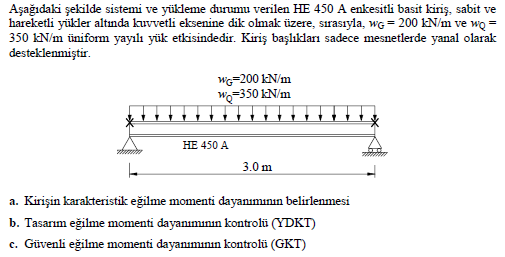 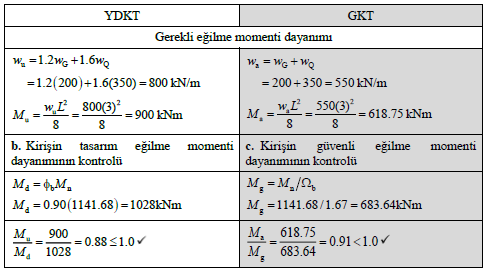

In [ ]:
M_ltb = Flexure(
                Mu   = Mu,
                Lb   = Lb_ltb,
                Iy   = Iy,
                h0   = h0,
                Sx   = Sx,
                Zx   = Zx,
                iy   = iy,
                Fy   = Fy,
                E    = E,
                J    = Jc,
                Mmax = Mmax,
                Ma   = Ma,
                Mb   = Mb,
                Mc   = Mc,
                fi_d = 0.9
            )

NameError: name 'Iy' is not defined

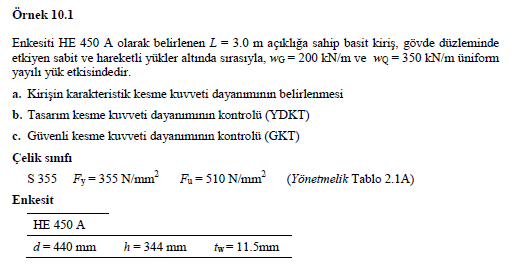 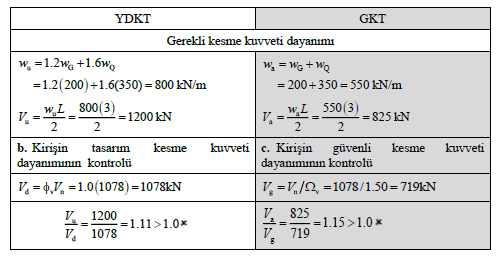

In [ ]:
Vn = Shear(Vu,
           a_stiffner,
           h,
           tw,
           d,
           bf_compression,
           tf_comp,
           bf_tension,
           tf_tension,
           E,
           Fy,
           Tension_field_action=False)

h/tw = 29.91 <= 60.33 = 1.10 * (kv*E/Fy)^0.5 ==> Cv1 = 1.0

h/tw=29.91 < 75.14360336555977 = 1.37*(kv*E/Fy)^0.5 ==> Cv2 kullanılamıyor.
Bu nedenle Cv2 = 0 alındı.

Rijitlik levhaları mevcut değil...

Vnominal = 0.6 * Fy * Aw * Cv1 = 0.6 * 355 * 5060.0 * 1.0 = 1077780.0

Vu = 1200.0kN >0.9*1077.78 = 970.002kN  gövde kesme kapasitesi yetersiz rijitlik levhaları kullanılmalı, 
rijitleştirme levhaları kullanıldı ise çekme alanı etkisi dikkate alınabilir
bunlara rağmen kurtarmıyorsa rijitlik levhalarının aralıkları azaltılmalı veya kiriş gövde kalınlığı arttırılmalıdır



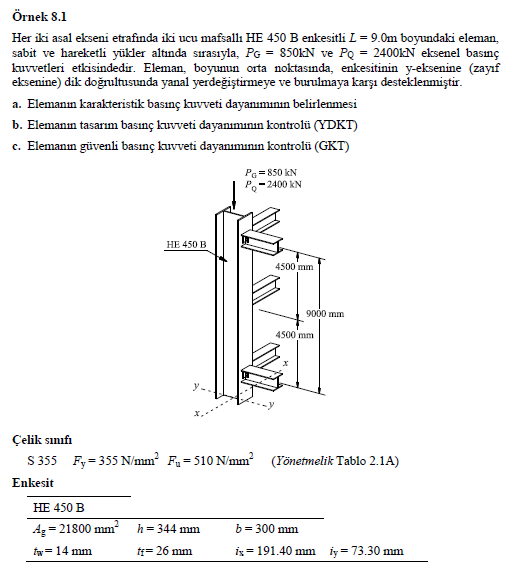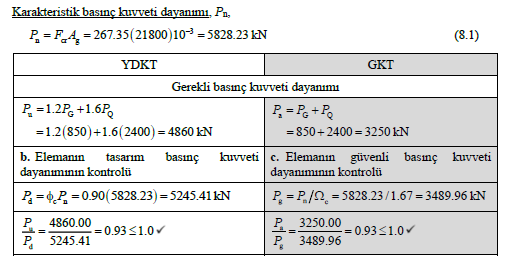

In [ ]:
Comp = Compression(4860*10**3, 9000, 4500, 9000, h0,Fy,E,Ix,Iy,191.40,73.30,21800,10,10,Jc,300)

X ekseninde elastik eğilme burkulma yükü:


<IPython.core.display.Latex object>

Y ekseninde elastik eğilme burkulma yükü:


<IPython.core.display.Latex object>

X ekseninde kritik eğilme burkulma yükü:


<IPython.core.display.Latex object>

Y ekseninde kritik eğilme burkulma yükü:


<IPython.core.display.Latex object>

X ekseninde kritik eğilmeli-burulmalı burkulma yükü:


<IPython.core.display.Latex object>

Y ekseninde kritik eğilmeli-burulmalı burkulma yükü:


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [ ]:
Pne = Comp.Fcr_e * Comp.Ag

In [ ]:
0.9 *Pne > Comp.Pu

True